# Linear Regression



## Univariate Linear Regression

[Gradient Descent based](#Gradient-Descent-based)  
[Closed form](#Closed-form)  
[Using Sklearn](#Using-sklearn)  
[Using Tensorflow](#Using-sklearn)

### Gradient Descent based
 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def generate_linear_data(w, N):
    """generate data"""
    x = np.random.uniform(low=0, high=20, size=(N, 1))
    # one column of ones for the bias
    x = np.hstack([np.ones((N, 1)), x])
    # linear data with uniform error
    y = x.dot(w) + (2 * np.random.random(N) -1)
    y = y.reshape((N, 1))
    return x, y


x, y = generate_linear_data(np.array([0, 1]), 20)
print(x.shape, y.shape)
plt.scatter(x[:, 1], y)
plt.show()

(20, 2) (20, 1)


<Figure size 640x480 with 1 Axes>

In [60]:
# our hypothesis
def hypothesis(w):
    """In this case, our hypothesis is a line"""
    return lambda x: x.dot(w)


def cost(w, x, y):
    # Mean squared error
    N = len(x)
    h = hypothesis(w)
    # print(x.shape, y.shape)
    hx = h(x).reshape(y.shape)
    # print("h(x)", h(x).shape)
    # print("np.square(h(x)-y)", (h_x -y).shape)
    # print(np.sum(np.square(h(x)-y)))
    return 1/(2*N) * np.sum(np.square(hx-y))


def cost_derivative(w, x, y):
    N = len(x)
    h = hypothesis(w)
    hx = h(x).reshape(y.shape)
    # print(hx.shape)
    s = (hx-y)*x
    # print(s.shape)
    return 1/N * np.sum(s, axis=0)

In [64]:
# find parameters that minimize the cost function: Gradient Descent


def gradient_descent(x, y, alpha=0.01, num_steps=1000):
    """Given data, return two parameters, a and b, for the best fit"""
    w = np.random.random(2)
    
    for i in range(num_steps):
        c = cost(w, x, y)
        new_w = w - alpha * cost_derivative(w, x, y)
        if i % 1000 == 0: 
            print("Iteration:\t", i, "\tcost:\t", c, "\tweights:\t", w)
        w = new_w
    return w

In [65]:
w = gradient_descent(x,y, alpha=0.01, num_steps=10000)
print("Final weights:", w)

Iteration:	 0 	cost:	 50.601850690657024 	weights:	 [0.40145301 0.05551425]
Iteration:	 1000 	cost:	 0.14902887535630802 	weights:	 [0.21034631 0.99658005]
Iteration:	 2000 	cost:	 0.14884620286935424 	weights:	 [0.17302136 0.99966453]
Iteration:	 3000 	cost:	 0.14884263439818737 	weights:	 [0.16780457 1.00009564]
Iteration:	 4000 	cost:	 0.14884256468880383 	weights:	 [0.16707543 1.00015589]
Iteration:	 5000 	cost:	 0.14884256332704468 	weights:	 [0.16697353 1.00016431]
Iteration:	 6000 	cost:	 0.14884256330044304 	weights:	 [0.16695928 1.00016549]
Iteration:	 7000 	cost:	 0.14884256329992324 	weights:	 [0.16695729 1.00016566]
Iteration:	 8000 	cost:	 0.14884256329991333 	weights:	 [0.16695701 1.00016568]
Iteration:	 9000 	cost:	 0.14884256329991297 	weights:	 [0.16695697 1.00016568]
Final weights: [0.16695697 1.00016568]


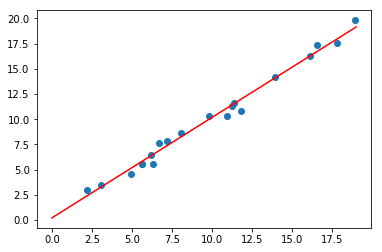

In [9]:
x_arr = np.arange(20).reshape((20, 1))
x_arr = np.hstack([np.ones((20, 1)), x_arr])
y_arr = hypothesis(w)(x_arr)

plt.scatter(x[:, 1], y)
plt.plot(x_arr[:, 1], y_arr, c="r")
plt.show()

### Closed-form

Closed-form weights: [0.16695697 1.00016568]


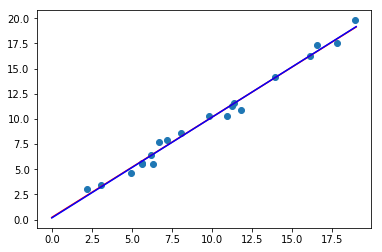

In [10]:
w_closed_form = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y).reshape(w.size)
print("Closed-form weights:", w_closed_form)
y_closed_form = hypothesis(w_closed_form)(x_arr)

plt.scatter(x[:, 1], y)
plt.plot(x_arr[:, 1], y_arr, c="r")
plt.plot(x_arr[:, 1], y_closed_form, c="b")
plt.show()

### Using Sklearn

[[0.         1.00016568]]


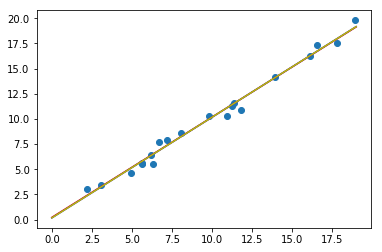

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)
y_sklearn = model.predict(x_arr)
print(model.coef_)
plt.scatter(x[:, 1], y)
plt.plot(x_arr[:, 1], y_arr, c="r")
plt.plot(x_arr[:, 1], y_closed_form, c="b")
plt.plot(x_arr[:, 1], y_sklearn, c="y")
plt.show()

### Using Tensorflow

Initial weights:  [0.2908591  0.61961985]
9.702579 weights:  [0.29801068 0.7068992 ]


0.3020373 weights:  [0.315245   0.98791134]
0.30170807 weights:  [0.3095269  0.98838395]


0.301404 weights:  [0.30402926 0.98883826]
0.30112252 weights:  [0.29874358 0.989275  ]


0.30086276 weights:  [0.29366186 0.9896949 ]
0.3006222 weights:  [0.28877595 0.9900987 ]


0.30040017 weights:  [0.28407845 0.9904869 ]
0.30019483 weights:  [0.27956215 0.99086016]


0.30000478 weights:  [0.27521998 0.9912189 ]
final loss:  0.299831 weights:  [0.2710862  0.99156064]


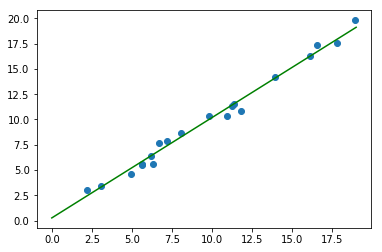

In [81]:
import tensorflow as tf

N = len(x)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform((2, )), name="weights", expected_shape=(2, ))

Y_Pred = tf.reshape(tf.tensordot(X, W, 1), (N, 1))
error = tf.square(Y_Pred - Y)
f_error = tf.reduce_sum(error)/len(x) # + tf.norm(W)
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(f_error)

epochs = 1000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Initial weights: ", W.eval())
    
    loss_expected = 0
    for i in range(epochs):
        
        # print(x.shape, y.shape)
        sess.run(optimizer, {X: x, Y: y})
        # print(Y_Pred.eval(feed_dict={X: x}, session=sess).shape)
        # print(error.eval(feed_dict={X: x, Y:y}, session=sess).shape)
        # 
        # None + 1
        
        loss_per_epoch = sess.run(f_error, {X: x, Y: y})
        
        # Allow the training to quit if we've reached a minimum
        if np.abs(loss_expected - loss_per_epoch) < 0.0000001:
            break
        loss_expected = loss_per_epoch
        
        if i%100==0:
            print(loss_expected, "weights: ", W.eval(session=sess))

    print("final loss: ", loss_expected, "weights: ", W.eval(session=sess))
    y_arr = Y_Pred.eval(feed_dict={X: x_arr}, session=sess)
    plt.figure()
    plt.scatter(x[:, 1], y)
    plt.plot(x_arr[:, 1], y_arr, c="g")
    plt.show()
    
